# Project 4 Write A Data Science Blog Post (using stack overflow survey)


# Introduction

The dataset explored in this notebook is a stack overflow 2017 survey and it was obtained from this website  https://www.kaggle.com/stackoverflow/so-survey-2017

The CRISP-DM process encompasses six elements:

* 1- Business Understanding.
* 2- Data Understanding.
* 3- Data Preparation.
* 4- Modeling.
* 5- Evaluation.
* 6- Deployment.

In this project, I will focus to find out the answers of the following questions:

- Q1: Which are the most programming languages that 'Students' prefer? 
    and which are the programming languages they have been worked with before?
- Q2: What is the average salary for professional developer in different countries?
- Q3: Which programming language has the highest job satisfaction?


### Step 1: Business Understanding 

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

### Step 2: Data Understanding

In [3]:
#loading dataset
df = pd.read_csv("data/survey_results_public.csv")
schema = pd.read_csv('data/survey_results_schema.csv')

In [4]:
df.shape

(51392, 154)

In [5]:
df.head(15)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Student,"Yes, both",New Zealand,"Yes, full-time","Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Disagree,NaN,A bachelor's degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN
6,7,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Master's degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...",20 to 99 employees,...,Disagree,Male,A doctoral degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN
7,8,Professional developer,"Yes, both",Poland,No,Employed full-time,Master's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),Fewer than 10 employees,...,Somewhat agree,Male,A master's degree,White or of European descent,Agree,Somewhat agree,Disagree,Agree,NaN,NaN
8,9,Professional developer,"Yes, I program as a hobby",Colombia,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","5,000 to 9,999 employees",...,Strongly disagree,Male,A bachelor's degree,Hispanic or Latino/Latina,Somewhat agree,Strongly agree,Disagree,Strongly agree,NaN,NaN
9,10,Professional developer,"Yes, I program as a hobby",France,"Yes, full-time","Independent contractor, freelancer, or self-em...",Master's degree,Computer science or software engineering,It's complicated,NaN,...,Disagree,Male,A doctoral degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,NaN,NaN


In [6]:
missing_col = df.isnull().sum()
missing_col

Respondent                         0
Professional                       0
ProgramHobby                       0
Country                            0
University                         0
EmploymentStatus                   0
FormalEducation                    0
MajorUndergrad                  8551
HomeRemote                      7384
CompanySize                    12470
CompanyType                    12569
YearsProgram                     247
YearsCodedJob                  10502
YearsCodedJobPast              50418
DeveloperType                  15267
WebDeveloperType               40696
MobileDeveloperType            49839
NonDeveloperType               46502
CareerSatisfaction              8697
JobSatisfaction                11016
ExCoderReturn                  50469
ExCoderNotForMe                50471
ExCoderBalance                 50469
ExCoder10Years                 50475
ExCoderBelonged                50464
ExCoderSkills                  50457
ExCoderWillNotCode             50470
E

In [7]:
missing_row = df.isnull().sum(axis=1)
missing_row

0         56
1         59
2         52
3         40
4        131
5         76
6         50
7         36
8         48
9         63
10        75
11       124
12        57
13        34
14        42
15        40
16        60
17        41
18       111
19        58
20       135
21        35
22        63
23        68
24       137
25        29
26        63
27       126
28        50
29       136
        ... 
51362     76
51363     79
51364     77
51365     67
51366    104
51367     35
51368     33
51369     48
51370     61
51371     47
51372     98
51373     54
51374     71
51375     62
51376     52
51377     43
51378     47
51379     94
51380     43
51381     45
51382     42
51383     49
51384     39
51385     41
51386     31
51387     42
51388     76
51389    130
51390     34
51391     52
Length: 51392, dtype: int64

In [8]:
#calculate percentage of missing values of each column
missing_percent_col = missing_col/(len(df))*100
missing_percent_col.sort_values(ascending = False, inplace=True)
missing_percent_col

ExCoder10Years               98.215676
ExCoderNotForMe              98.207892
ExCoderWillNotCode           98.205946
ExCoderReturn                98.204001
ExCoderBalance               98.204001
ExCoderBelonged              98.194271
ExCoderActive                98.190380
ExCoderSkills                98.180651
YearsCodedJobPast            98.104763
MobileDeveloperType          96.978129
ExpectedSalary               95.007005
TimeAfterBootcamp            94.936955
NonDeveloperType             90.484900
WebDeveloperType             79.187422
Salary                       74.916329
Overpaid                     73.951199
HaveWorkedFramework          60.637842
HoursPerWeek                 59.915940
Currency                     58.343711
InfluenceConsultants         58.077133
InfluenceCommunication       58.012920
InfluenceServers             58.001245
InfluenceRecruitment         57.997354
InfluenceDeptTech            57.983733
InfluenceCloud               57.979841
InfluenceTechStack       

In [9]:
#calculate percentage of missing values of each row
missing_percent_row = missing_row/(len(df.columns))*100
missing_percent_row.sort_values(ascending = False, inplace=True)
missing_percent_row

36811    95.454545
44339    95.454545
15829    95.454545
13785    94.805195
12395    94.805195
34425    94.805195
15195    94.805195
15904    94.805195
6928     94.805195
37945    94.805195
7428     94.805195
15466    94.805195
23688    94.805195
17090    94.805195
5017     94.805195
34212    94.805195
4393     94.805195
9699     94.805195
29863    94.805195
19464    94.805195
38570    94.805195
2723     94.805195
17505    94.805195
23868    94.805195
33630    94.805195
35505    94.805195
11684    94.805195
37316    94.805195
15210    94.805195
18869    94.805195
           ...    
10580     8.441558
10824     8.441558
44002     8.441558
13499     8.441558
12589     8.441558
12531     8.441558
12447     8.441558
12435     8.441558
12350     8.441558
13592     8.441558
15088     8.441558
13646     8.441558
12028     8.441558
11838     8.441558
14788     8.441558
14375     8.441558
11693     8.441558
14651     8.441558
11518     8.441558
11210     8.441558
11151     8.441558
11111     8.

### Q1: Which are the most programming languages that 'Students' prefer? and which are the programming languages they have been worked with before?

### Step 3: Data Preparation

In [10]:
df_1 = df[['Professional', 'HaveWorkedLanguage','WantWorkLanguage']]
df_1 = df_1[df_1.Professional == "Student"]
df_1.head(10)

,Professional,HaveWorkedLanguage,WantWorkLanguage
0,Student,Swift,Swift
1,Student,JavaScript; Python; Ruby; SQL,Java; Python; Ruby; SQL
5,Student,JavaScript; PHP; Rust,Clojure; Elixir; Erlang; Haskell; Rust; TypeSc...
43,Student,NaN,NaN
45,Student,C; C++; Groovy; Java; Python,NaN
56,Student,C#,C#; F#
87,Student,NaN,NaN
98,Student,NaN,NaN
114,Student,C#,Assembly; C; C++; C#; Java
117,Student,VB.NET,C#; Ruby


### Step 4: Modeling

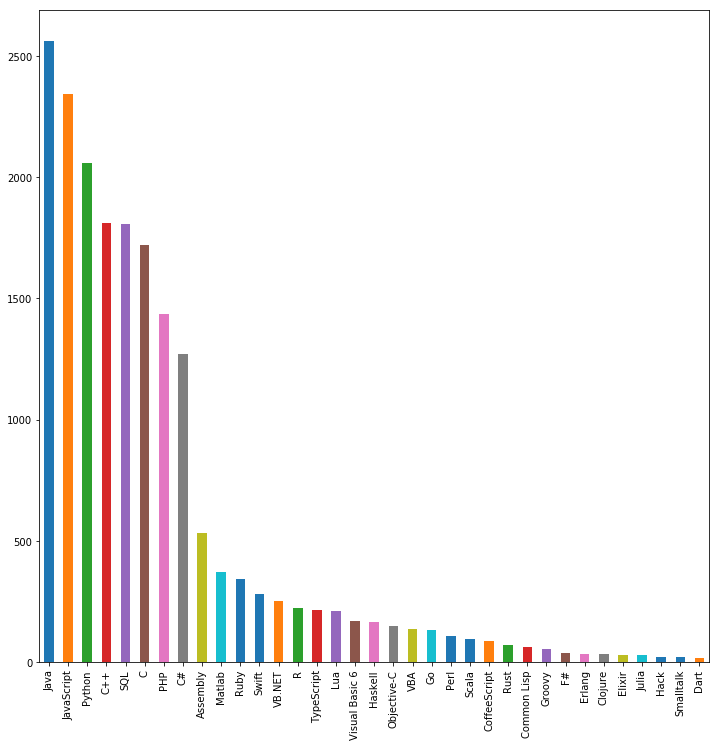

In [11]:
Std_languages_worked = df_1['HaveWorkedLanguage'].str.split('; ', expand=True).stack().value_counts()
Std_languages_worked.plot(kind="bar", figsize=(12,12))

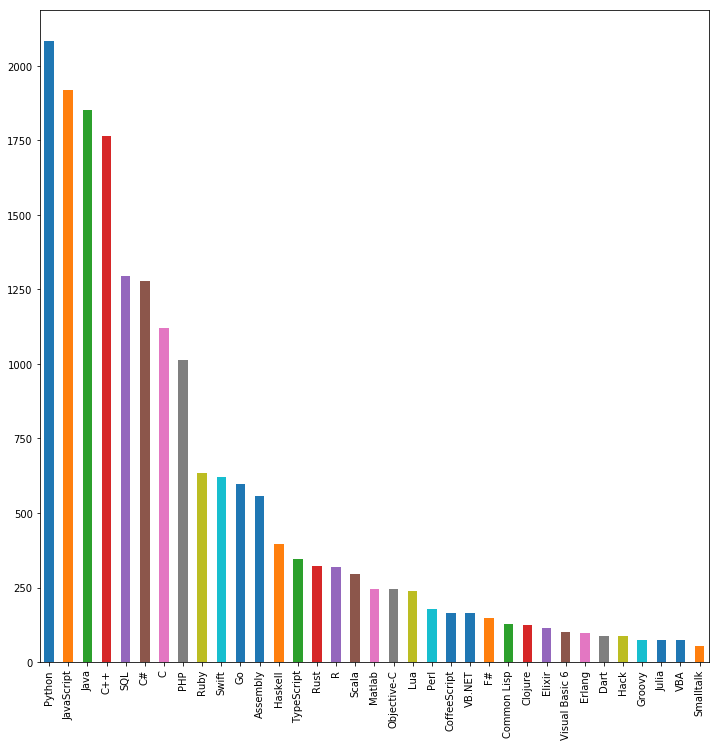

In [12]:
Std_languages_want = df_1['WantWorkLanguage'].str.split('; ', expand=True).stack().value_counts()
Std_languages_want.plot(kind="bar", figsize=(12,12))

### Step 5: Evaluation

As we can see from the above plots, the ......

## Q2: What is the average salary for professional developer in different countries?

### Step 3: Data Preparation

In [13]:
df.Professional.unique()

array(['Student', 'Professional developer',
       'Professional non-developer who sometimes writes code',
       'Used to be a professional developer', 'None of these'],
      dtype=object)

In [14]:
np.sum(df.Salary.isnull() == True)

38501

In [15]:
df_2 = df[['Professional','Country','Salary']]
df_2 = df_2[(df_2.Professional == "Professional developer")]
df_2.head(10)

,Professional,Country,Salary
2,Professional developer,United Kingdom,113750.0
4,Professional developer,Switzerland,NaN
7,Professional developer,Poland,NaN
8,Professional developer,Colombia,NaN
9,Professional developer,France,NaN
11,Professional developer,Canada,NaN
13,Professional developer,Germany,NaN
14,Professional developer,United Kingdom,100000.0
15,Professional developer,United States,NaN
16,Professional developer,United Kingdom,NaN


In [19]:
# make sure there is no missing values in Country column
df_2.Country.isnull().sum()

0

In [16]:
# number of missing values in Salary column
df_2.Salary.isnull().sum()

23240

In [17]:
# shape before droping the missing values in Salary column
df_2.shape

(36131, 3)

In [18]:
# droping missing values in Salary column
df_2.dropna(subset=['Salary'], inplace=True)
df_2

,Professional,Country,Salary
2,Professional developer,United Kingdom,113750.000000
14,Professional developer,United Kingdom,100000.000000
17,Professional developer,United States,130000.000000
18,Professional developer,United States,82500.000000
22,Professional developer,Israel,100764.000000
25,Professional developer,United States,175000.000000
34,Professional developer,Croatia,14838.709677
36,Professional developer,Argentina,28200.000000
37,Professional developer,Germany,118279.569892
52,Professional developer,Brazil,15674.203822


In [215]:
# shape after the missing values droped
df_2.shape

(12891, 2)

### Step 4: Modeling

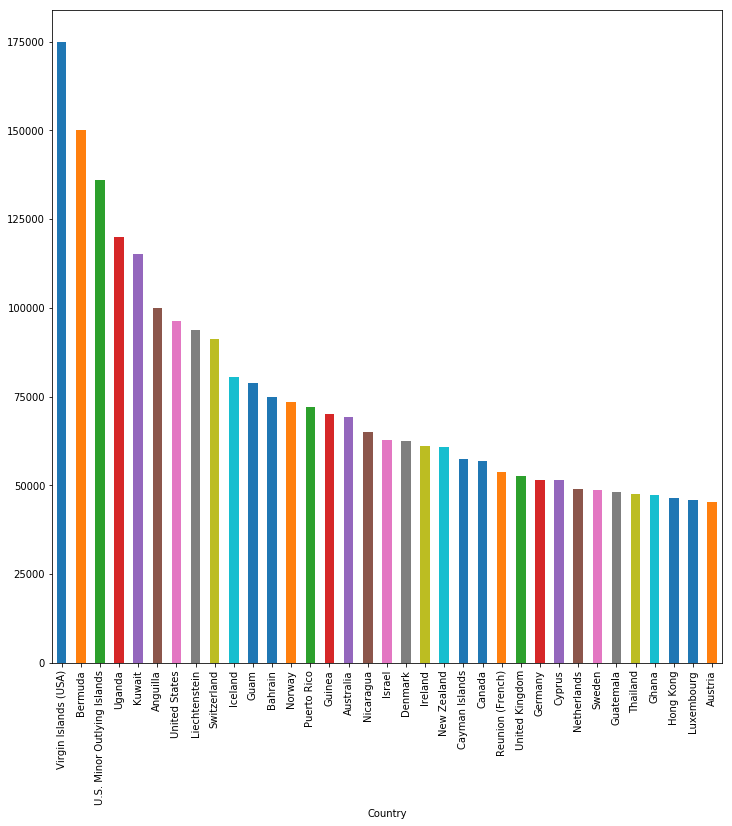

In [30]:
df_2_forplot = df_2.groupby(['Country']).mean()['Salary'].sort_values(ascending = False)
df_2_forplot[:35].plot(kind="bar", figsize=(12,12))

In [32]:
df_2_forplot.head(10)

Country
Virgin Islands (USA)           175000.000000
Bermuda                        150000.000000
U.S. Minor Outlying Islands    136000.000000
Uganda                         120000.000000
Kuwait                         115200.000000
Anguilla                       100000.000000
United States                   96194.754635
Liechtenstein                   93766.666667
Switzerland                     91189.692616
Iceland                         80645.161290
Name: Salary, dtype: float64

### Step 5: Evaluation

## Q3: Which developer type has the highest job satisfaction?

### Step 3: Data Preparation

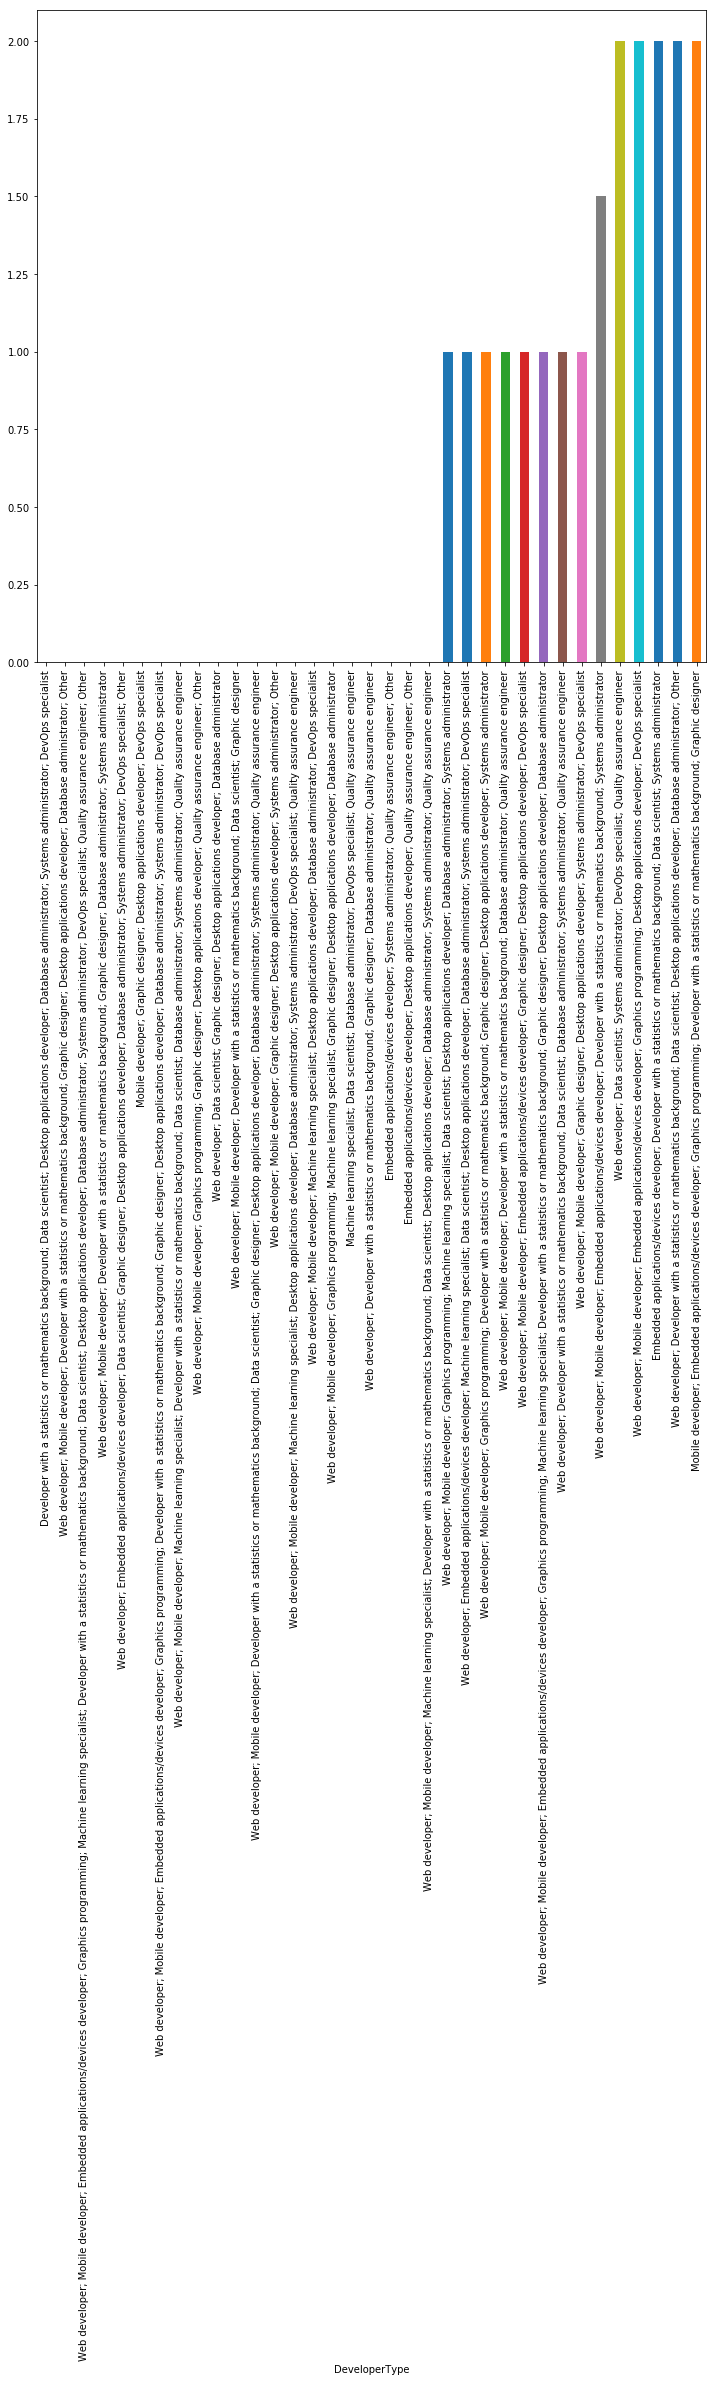

In [46]:
df_3_forplot = df.groupby(['DeveloperType']).mean()['JobSatisfaction'].sort_values()
df_3_forplot[:35].plot(kind="bar", figsize=(12,12))

### Step 4: Modeling

In [ ]:
df_3_forplot = df.groupby(['DeveloperType']).mean()['JobSatisfaction'].sort_values()
df_3_forplot.plot(kind="bar", figsize=(12,12))

### Step 5: Evaluation

# Conclusions